### HW2 - Kiarash Gheysari pour 

in this assignment we'll explore two energy related datasets 
one of which is the dataset of all the worlds power plants , which i wanted to use to see the trend of electrical energy generation in our beloved country , which seems to be struggling to meet the demands even for domestic usage! <br>
long story short there seems to be a shortage of data on the amount of energy generated in our power plants as we are about to see soon! (intentional ?) <br>
so i tried a new dataset which has the data of electrical energy generated monthly for different country's (except ours :D ) <br>
for now we'll have to just watch the trend of energy generation for different countrys , inshallah next week i'll try to get my hands on some good data on our countrys power generation!

Global Power plant database link : 
http://datasets.wri.org/dataset/globalpowerplantdatabase

let's import it and see whats in it

In [2]:
import pandas as pd
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

df = pd.read_csv('global_power_plant_database.csv')

C:\Users\darkoob\AppData\Local\Temp\ipykernel_14980\1640727917.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


In [11]:
df.shape


(34936, 36)

In [81]:
df.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


oopsie !<br>
there seems to be a crapload of data missing <br>
and on the most important columns , the amount of energy generated !!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

let's see how our beloved country's holding up.<br>
(energy wise ;)

In [24]:
irans_pps = df[df['country'] == 'IRN']
irans_pps

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
15819,IRN,Iran,Abadan C.C.,WRI1008113,820.0,30.4020,48.3580,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,4355.53,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15820,IRN,Iran,Ahwaz (ramiin),WRI1008114,1903.0,31.5027,48.8830,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,5245.60,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15821,IRN,Iran,Aliabad Power Plant,WRI1029942,1000.0,36.9443,54.8902,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,5311.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15822,IRN,Iran,Amir Kabir,WRI1008115,90.0,35.9564,51.0890,Hydro,NaN,NaN,...,117.76,117.76,111.86,144.88,126.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
15823,IRN,Iran,Amir Kabir,WKS0070133,7.0,35.0100,48.0300,Solar,NaN,NaN,...,14.07,13.30,14.10,13.99,14.09,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,IRN,Iran,Zahedan,WRI1008207,100.0,29.4770,60.8070,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,275.64,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15922,IRN,Iran,Zarand,WRI1008208,60.0,30.8127,56.5640,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,165.38,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15923,IRN,Iran,Zargan,WRI1008209,43.0,31.3742,48.7731,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,228.39,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15924,IRN,Iran,Zobahan,WRI1008211,162.0,32.6572,51.6776,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,860.48,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


the situation is not promising!

let's see if we there's any data on our big power plants <br>
after all they're the most important one's

In [32]:
irans_pps = irans_pps.sort_values(by = 'capacity_mw' , ascending=False)

In [34]:
irans_pps[:15]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
15836,IRN,Iran,Damavand C.C.,WRI1008128,2800.0,35.4156,51.8510,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,14872.54,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15897,IRN,Iran,Shahid Rajaee,WRI1008186,2040.0,36.1595,50.2997,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,10835.71,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15858,IRN,Iran,Karoune 3,WRI1008151,2000.0,31.8055,50.0893,Hydro,NaN,NaN,...,5104.31,4819.58,4710.52,4662.19,4669.67,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
15874,IRN,Iran,Masjed Soleyman,WRI1008163,2000.0,32.0290,49.3990,Hydro,NaN,NaN,...,5660.39,5136.36,4485.13,4687.62,4582.95,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
15894,IRN,Iran,Shahid Abbaspuor,WRI1008183,2000.0,32.0549,49.6070,Hydro,NaN,NaN,...,5644.99,4482.50,4485.13,4623.58,4610.94,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
15861,IRN,Iran,Kerman,WRI1008153,1912.0,30.2100,56.7932,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,10155.82,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15820,IRN,Iran,Ahwaz (ramiin),WRI1008114,1903.0,31.5027,48.8830,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,5245.60,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15879,IRN,Iran,Neka (Shahid Salimi),WRI1008169,1779.6,36.8387,53.2593,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,4905.45,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15895,IRN,Iran,Shahid M. Montazeri,WRI1008184,1600.0,32.7952,51.4959,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,4410.38,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
15904,IRN,Iran,Shirvan,WRI1008192,1404.0,37.3397,58.0486,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,7457.52,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


not good , and it seems like the nuclear plant of booshehr isnt here either.
is it a big no no info wise?

out of curiosity , lets take a look at some nuclear plants

In [39]:
df[df["primary_fuel"] == 'Nuclear']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
101,ARG,Argentina,ATUCHA I,ARG0000029,370.0,-33.9670,-59.2059,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,1303.91,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
102,ARG,Argentina,ATUCHA II,ARG0000030,745.0,-33.9674,-59.2045,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,2625.45,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
229,ARG,Argentina,EMBALSE,ARG0000112,648.0,-32.2316,-64.4422,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,2283.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
328,ARM,Armenia,Armenian-2,WRI1019028,375.0,40.1805,44.1498,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,2411.04,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
1043,BEL,Belgium,DOEL 4,WRI1002223,2910.0,51.3254,4.2597,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,20203.97,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33710,USA,United States of America,V C Summer,USA0006127,1029.6,34.2983,-81.3153,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,8168.11,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
33850,USA,United States of America,Vogtle,USA0000649,2430.0,33.1427,-81.7625,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,19277.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34035,USA,United States of America,Waterford 3,USA0004270,1199.8,29.9953,-90.4716,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,9518.35,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34055,USA,United States of America,Watts Bar Nuclear Plant,USA0007722,2539.8,35.6021,-84.7895,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,20148.96,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


let's see of the estimated generation columns got anything in it , we'll take it if it's the only thing we've got

In [52]:
irans_pps.iloc[:20 , [2 , 4 , 7 , 26 , 27 , 28 , 29 , 30]]

,name,capacity_mw,primary_fuel,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
15836,Damavand C.C.,2800.0,Gas,NaN,NaN,NaN,NaN,14872.54
15897,Shahid Rajaee,2040.0,Gas,NaN,NaN,NaN,NaN,10835.71
15858,Karoune 3,2000.0,Hydro,5104.31,4819.58,4710.52,4662.19,4669.67
15874,Masjed Soleyman,2000.0,Hydro,5660.39,5136.36,4485.13,4687.62,4582.95
15894,Shahid Abbaspuor,2000.0,Hydro,5644.99,4482.50,4485.13,4623.58,4610.94
15861,Kerman,1912.0,Gas,NaN,NaN,NaN,NaN,10155.82
15820,Ahwaz (ramiin),1903.0,Oil,NaN,NaN,NaN,NaN,5245.60
15879,Neka (Shahid Salimi),1779.6,Oil,NaN,NaN,NaN,NaN,4905.45
15895,Shahid M. Montazeri,1600.0,Oil,NaN,NaN,NaN,NaN,4410.38
15904,Shirvan,1404.0,Gas,NaN,NaN,NaN,NaN,7457.52


this dataset just keeps on getting worse

down here i've played around a bit comparing china and us , you can go ahead and ignore it. i've erased most of it anyway.

In [53]:
df2 = df.sort_values(by = 'capacity_mw' , ascending=False)

In [67]:
usa_data = df2[df2["country"] == 'USA']

In [61]:
df2[df2["country"] == 'CHN']['capacity_mw'].sum()

np.float64(1415067.3800000001)

In [62]:
df2[df2["country"] == 'USA']['capacity_mw'].sum()

np.float64(1204638.0499999998)

In [80]:
generationusa = usa_data.iloc[: ,18:25]
generationusa.info()
generationusa.describe()
generationusa.sum()

<class 'pandas.core.frame.DataFrame'>
Index: 9833 entries, 28190 to 31119
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   generation_gwh_2013  6145 non-null   float64
 1   generation_gwh_2014  6562 non-null   float64
 2   generation_gwh_2015  7011 non-null   float64
 3   generation_gwh_2016  7746 non-null   float64
 4   generation_gwh_2017  8370 non-null   float64
 5   generation_gwh_2018  8950 non-null   float64
 6   generation_gwh_2019  9659 non-null   float64
dtypes: float64(7)
memory usage: 614.6 KB


generation_gwh_2013    3.474741e+06
generation_gwh_2014    3.456613e+06
generation_gwh_2015    3.573784e+06
generation_gwh_2016    3.512827e+06
generation_gwh_2017    3.529342e+06
generation_gwh_2018    3.634343e+06
generation_gwh_2019    4.094667e+06
dtype: float64

In [84]:
chn_data = df2[df2["country"] == 'CHN']
generationchn = chn_data.iloc[: ,26:31]
generationchn.info()
generationchn.describe()
generationchn.sum()

<class 'pandas.core.frame.DataFrame'>
Index: 4235 entries, 8453 to 8941
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   estimated_generation_gwh_2013  2263 non-null   float64
 1   estimated_generation_gwh_2014  2263 non-null   float64
 2   estimated_generation_gwh_2015  2263 non-null   float64
 3   estimated_generation_gwh_2016  2263 non-null   float64
 4   estimated_generation_gwh_2017  4235 non-null   float64
dtypes: float64(5)
memory usage: 198.5 KB


estimated_generation_gwh_2013     745110.74
estimated_generation_gwh_2014     929531.06
estimated_generation_gwh_2015     907931.27
estimated_generation_gwh_2016    1010182.31
estimated_generation_gwh_2017    6193117.75
dtype: float64

In [83]:
generationchn

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
8453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8986,NaN,NaN,NaN,NaN,NaN,NaN,NaN


here comes the second dataset 
### Monthly Electricity Statistics !
let's see whats in it.


In [4]:
df2 = pd.read_csv("MES_1124.csv")

C:\Users\darkoob\AppData\Local\Temp\ipykernel_14980\3015955167.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("MES_1124.csv")


In [5]:
df2.shape

(147505, 6)

In [7]:
list(df2.columns)

['The Monthly electricity data explorer and the main highlights are available here: https://www.iea.org/reports/monthly-electricity-statistics-overview',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5']

that seems weird??

In [9]:
df2[:15]

,The Monthly electricity data explorer and the main highlights are available here: https://www.iea.org/reports/monthly-electricity-statistics-overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Please note that your use of IEA data is subje...,NaN,NaN,NaN,NaN,NaN
2,"In particular, external dissemination of any I...",NaN,NaN,NaN,NaN,NaN
3,Please contact us at stats@iea.org if you have...,NaN,NaN,NaN,NaN,NaN
4,Last update:,12 February 2025,NaN,NaN,NaN,NaN
5,"This notice, and any copyright or sourcing sta...",NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,Country,Time,Balance,Product,Value,Unit
8,Australia,November 2024,Net Electricity Production,Electricity,22029.6882,GWh
9,Australia,November 2024,Net Electricity Production,Hydro,1387.1418,GWh


oh , it seems like the creator has been kind enough to leave us some notes and f***ng up our dataset just a tiny bit.<br>
no problemo , nothing we can't fix

In [11]:
df2.drop( range(0,8) , inplace=True)

In [12]:
df2.head()

,The Monthly electricity data explorer and the main highlights are available here: https://www.iea.org/reports/monthly-electricity-statistics-overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
8,Australia,November 2024,Net Electricity Production,Electricity,22029.6882,GWh
9,Australia,November 2024,Net Electricity Production,Hydro,1387.1418,GWh
10,Australia,November 2024,Net Electricity Production,Total Combustible Fuels,12268.4027,GWh
11,Australia,November 2024,Net Electricity Production,"Coal, Peat and Manufactured Gases",8527.233,GWh
12,Australia,November 2024,Net Electricity Production,Oil and Petroleum Products,305.399,GWh


lets fix the indexes

In [13]:
df2.reset_index(drop=True, inplace=True)
df2.head()


,The Monthly electricity data explorer and the main highlights are available here: https://www.iea.org/reports/monthly-electricity-statistics-overview,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Australia,November 2024,Net Electricity Production,Electricity,22029.6882,GWh
1,Australia,November 2024,Net Electricity Production,Hydro,1387.1418,GWh
2,Australia,November 2024,Net Electricity Production,Total Combustible Fuels,12268.4027,GWh
3,Australia,November 2024,Net Electricity Production,"Coal, Peat and Manufactured Gases",8527.233,GWh
4,Australia,November 2024,Net Electricity Production,Oil and Petroleum Products,305.399,GWh


Now's the time for columns

In [19]:
df2.columns = ['country' , 'time' , 'balance' , 'product' , 'value' , 'unit']

In [15]:
df2.head()

,country,time,balance,product,vlaue,unit
0,Australia,November 2024,Net Electricity Production,Electricity,22029.6882,GWh
1,Australia,November 2024,Net Electricity Production,Hydro,1387.1418,GWh
2,Australia,November 2024,Net Electricity Production,Total Combustible Fuels,12268.4027,GWh
3,Australia,November 2024,Net Electricity Production,"Coal, Peat and Manufactured Gases",8527.233,GWh
4,Australia,November 2024,Net Electricity Production,Oil and Petroleum Products,305.399,GWh


well alright , everything seems in place , let's see whats in this dataset!

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147497 entries, 0 to 147496
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   country  147497 non-null  object
 1   time     147497 non-null  object
 2   balance  147497 non-null  object
 3   product  147497 non-null  object
 4   vlaue    147470 non-null  object
 5   unit     147497 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


well alright!<br>
barely any data is missing , lets see where those 27 values are.

In [26]:
df2[df2['value'].isnull()]


,country,time,balance,product,value,unit
80,Colombia,November 2024,Remarks,Data is estimated for this month,NaN,GWh
94,Costa Rica,November 2024,Remarks,Data is estimated for this month,NaN,GWh
242,Iceland,November 2024,Remarks,Data is estimated for this month,NaN,GWh
286,Japan,November 2024,Remarks,Data is estimated for this month,NaN,GWh
895,Colombia,October 2024,Remarks,Data is estimated for this month,NaN,GWh
909,Costa Rica,October 2024,Remarks,Data is estimated for this month,NaN,GWh
1721,Costa Rica,September 2024,Remarks,Data is estimated for this month,NaN,GWh
2534,Costa Rica,August 2024,Remarks,Data is estimated for this month,NaN,GWh
3347,Costa Rica,July 2024,Remarks,Data is estimated for this month,NaN,GWh
4160,Costa Rica,June 2024,Remarks,Data is estimated for this month,NaN,GWh


Hmmm , costa rica seems to have a lot of data missing , let's see what up with that.

In [28]:
df2[df2["country"] == 'Costa Rica'][:50]

,country,time,balance,product,value,unit
94,Costa Rica,November 2024,Remarks,Data is estimated for this month,NaN,GWh
95,Costa Rica,November 2024,Net Electricity Production,Electricity,1054.204,GWh
96,Costa Rica,November 2024,Net Electricity Production,Total Combustible Fuels,0.2479,GWh
97,Costa Rica,November 2024,Net Electricity Production,Hydro,895.2564,GWh
98,Costa Rica,November 2024,Net Electricity Production,Oil and Petroleum Products,0.1398,GWh
99,Costa Rica,November 2024,Net Electricity Production,Combustible Renewables,0.1081,GWh
100,Costa Rica,November 2024,Net Electricity Production,Geothermal,98.7897,GWh
101,Costa Rica,November 2024,Net Electricity Production,Solar,6.3612,GWh
102,Costa Rica,November 2024,Net Electricity Production,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",1054.0643,GWh
103,Costa Rica,November 2024,Total Imports,Electricity,4.5195,GWh


Oh , the null values seem just to point out that , that months values are estimated!<br>
another note worth taking is just how much of costa ricas electricity is coming from renewable resources , like god daaaamn.<br>
let's look at another "oilless" country (spell much?)<br>
take iceland for example

In [29]:
df2[df2["country"] == 'Iceland'][:50]

,country,time,balance,product,value,unit
242,Iceland,November 2024,Remarks,Data is estimated for this month,NaN,GWh
243,Iceland,November 2024,Net Electricity Production,Electricity,1529.1078,GWh
244,Iceland,November 2024,Net Electricity Production,Total Combustible Fuels,0.1677,GWh
245,Iceland,November 2024,Net Electricity Production,Hydro,1122.9641,GWh
246,Iceland,November 2024,Net Electricity Production,Oil and Petroleum Products,0.1677,GWh
247,Iceland,November 2024,Net Electricity Production,Geothermal,404.6227,GWh
248,Iceland,November 2024,Net Electricity Production,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",1528.9401,GWh
249,Iceland,November 2024,Distribution Losses,Electricity,41.9187,GWh
250,Iceland,November 2024,Final Consumption (Calculated),Electricity,1487.189,GWh
251,Iceland,November 2024,Net Electricity Production,Wind,1.3534,GWh


jesus , almost all the energy is renewable!

let's play around and see the monthly energy trend for germany

In [36]:
germany2024 = df2[(df2['country'] == 'Germany') & (df2['time'].apply(lambda x: '2024' in str(x)))]


In [60]:
electricity_data = germany2024[(germany2024['product'] == 'Electricity') & (germany2024['balance'] == 'Net Electricity Production')]
electricity_data

,country,time,balance,product,value,unit
190,Germany,November 2024,Net Electricity Production,Electricity,41364.7499,GWh
1006,Germany,October 2024,Net Electricity Production,Electricity,38142.2155,GWh
1818,Germany,September 2024,Net Electricity Production,Electricity,36667.7016,GWh
2631,Germany,August 2024,Net Electricity Production,Electricity,35950.1721,GWh
3444,Germany,July 2024,Net Electricity Production,Electricity,36367.6825,GWh
4257,Germany,June 2024,Net Electricity Production,Electricity,35785.0461,GWh
5068,Germany,May 2024,Net Electricity Production,Electricity,36255.6109,GWh
5881,Germany,April 2024,Net Electricity Production,Electricity,38479.0130,GWh
6696,Germany,March 2024,Net Electricity Production,Electricity,41171.6902,GWh
7508,Germany,February 2024,Net Electricity Production,Electricity,42455.8010,GWh


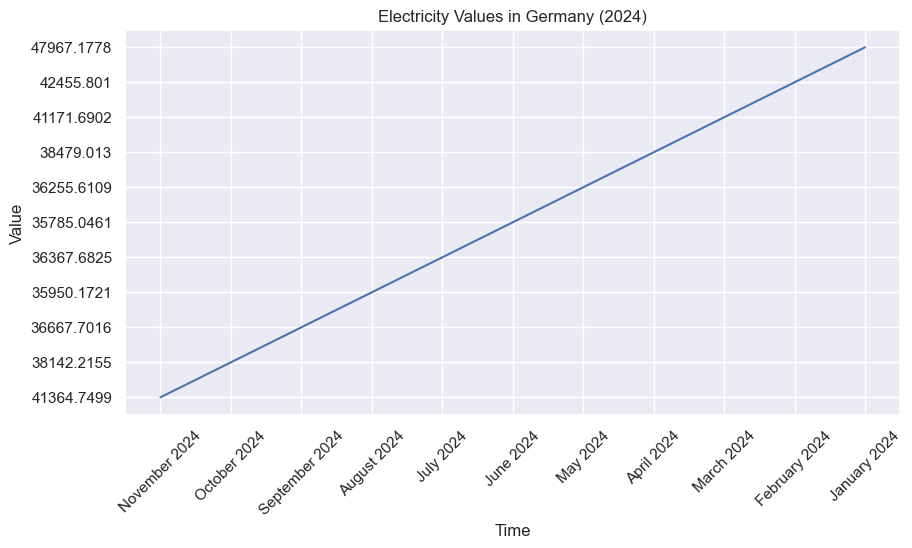

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(electricity_data['time'], electricity_data['value'])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Electricity Values in Germany (2024)')
plt.xticks(rotation=45) 
plt.grid(True)

plt.show()


now that's a weird plot
after careful consideration and cursing gpt an idea occured to me that maybe the data type is the problem??

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147497 entries, 0 to 147496
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   country  147497 non-null  object
 1   time     147497 non-null  object
 2   balance  147497 non-null  object
 3   product  147497 non-null  object
 4   value    147470 non-null  object
 5   unit     147497 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


yep , thats it .<br>
let's fix it.

In [49]:
df2['value'] = pd.to_numeric(df2['value'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147497 entries, 0 to 147496
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  147497 non-null  object 
 1   time     147497 non-null  object 
 2   balance  147497 non-null  object 
 3   product  147497 non-null  object 
 4   value    147470 non-null  float64
 5   unit     147497 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.8+ MB


In [58]:
germany2024['value'] = pd.to_numeric(germany2024['value'], errors='coerce')


C:\Users\darkoob\AppData\Local\Temp\ipykernel_14980\544040726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany2024['value'] = pd.to_numeric(germany2024['value'], errors='coerce')


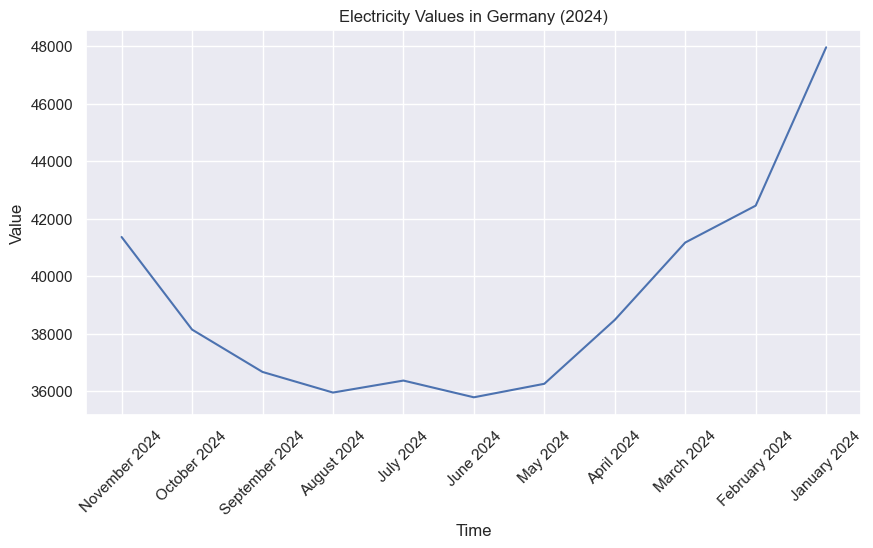

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(electricity_data['time'], electricity_data['value'])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Electricity Values in Germany (2024)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

now that's a Plot!<br>
we have a weird bowl trend going on!<br>
is it 2024 specific ?<br>
let's see

In [63]:
germany2023 = df2[(df2['country'] == 'Germany') & (df2['time'].apply(lambda x: '2023' in str(x)))]
germany2023 = germany2023[(germany2023['product'] == 'Electricity') & (germany2023['balance'] == 'Net Electricity Production')]

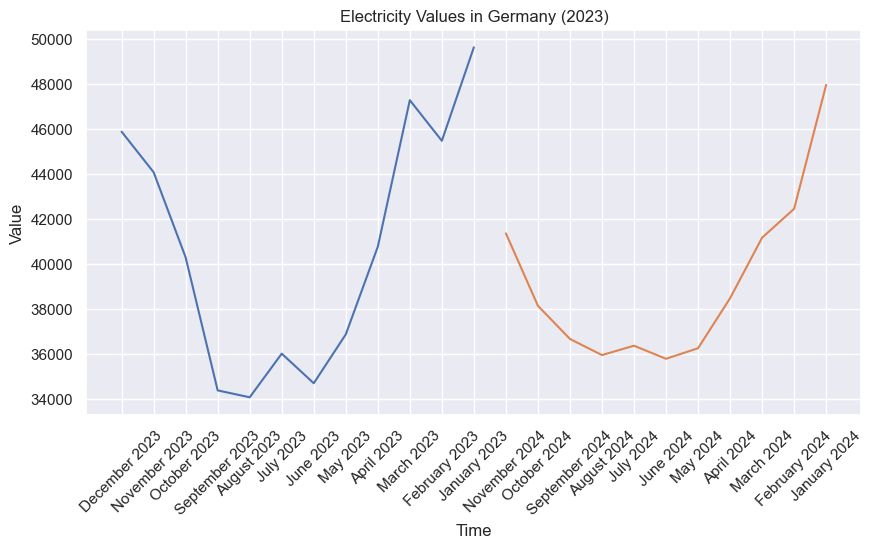

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(germany2023['time'], germany2023['value'])
plt.plot(electricity_data['time'], electricity_data['value'])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Electricity Values in Germany (2023)')
plt.xticks(rotation=45)  
plt.grid(True)

oops , i didn't see that coming<br>
lets add a column just for the month<br>
and another one to have the date numerically , i doubt it'll hurt.

In [67]:
def extract_month(date_str):
    return date_str.split()[0]
def create_date_format(date_str):
    from datetime import datetime
    return datetime.strptime(date_str, '%B %Y').strftime('%Y%m')

In [69]:
df2['month'] = df2['time'].apply(extract_month)
df2['date_Format'] = df2['time'].apply(create_date_format)


In [70]:
df2.head()

,country,time,balance,product,value,unit,month,date_Format
0,Australia,November 2024,Net Electricity Production,Electricity,22029.6882,GWh,November,202411
1,Australia,November 2024,Net Electricity Production,Hydro,1387.1418,GWh,November,202411
2,Australia,November 2024,Net Electricity Production,Total Combustible Fuels,12268.4027,GWh,November,202411
3,Australia,November 2024,Net Electricity Production,"Coal, Peat and Manufactured Gases",8527.2330,GWh,November,202411
4,Australia,November 2024,Net Electricity Production,Oil and Petroleum Products,305.3990,GWh,November,202411


well alright <br>
lets give that plot another go!

In [75]:
germany2024 = df2[(df2['country'] == 'Germany') & (df2['balance'] == 'Net Electricity Production') & (df2['product'] == 'Electricity') & df2['date_Format'].str.startswith('2024')]

germany2023 = df2[(df2['country'] == 'Germany') & (df2['balance'] == 'Net Electricity Production') & (df2['product'] == 'Electricity') & df2['date_Format'].str.startswith('2023')]

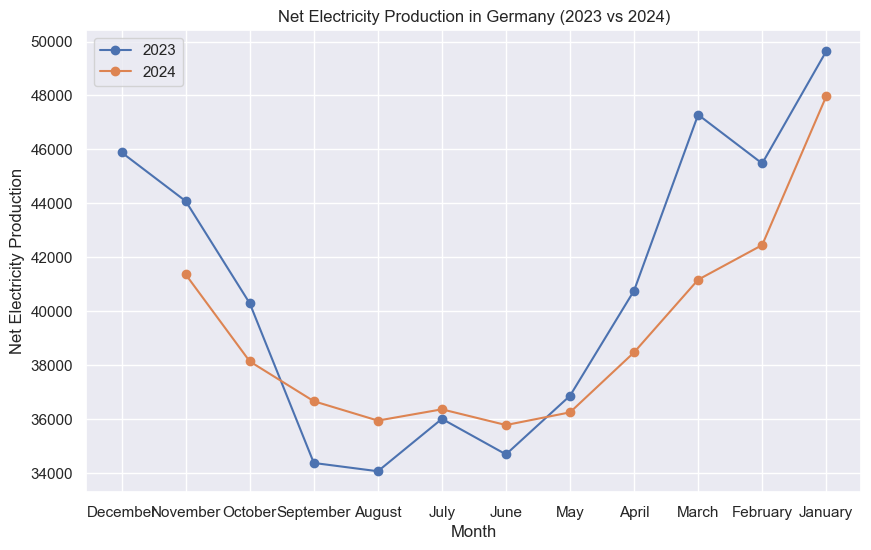

In [77]:
plt.figure(figsize=(10, 6))

plt.plot(germany2023['month'], germany2023['value'], label='2023', marker='o')

plt.plot(germany2024['month'], germany2024['value'], label='2024', marker='o')

plt.xlabel('Month')
plt.ylabel('Net Electricity Production')
plt.title('Net Electricity Production in Germany (2023 vs 2024)')
plt.legend()
plt.grid(True)
plt.show()

Hmmm , the same trend .<br>
probably weather related?

In [78]:
df2["country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Republic of Turkiye', 'United Kingdom',
       'United States', 'OECD Americas', 'OECD Asia Oceania',
       'OECD Europe', 'OECD Total', 'IEA Total', 'Argentina', 'Brazil',
       'Bulgaria', "People's Republic of China", 'Croatia', 'Cyprus',
       'India', 'Malta', 'North Macedonia', 'Romania', 'Serbia'],
      dtype=object)

let's check this the trend for a warmer country that's in the Order of germany's economical status(at least near it)<br>
italy seems good!.


In [79]:
italy2024 = df2[(df2['country'] == 'Italy') & (df2['balance'] == 'Net Electricity Production') & (df2['product'] == 'Electricity') & df2['date_Format'].str.startswith('2024')]


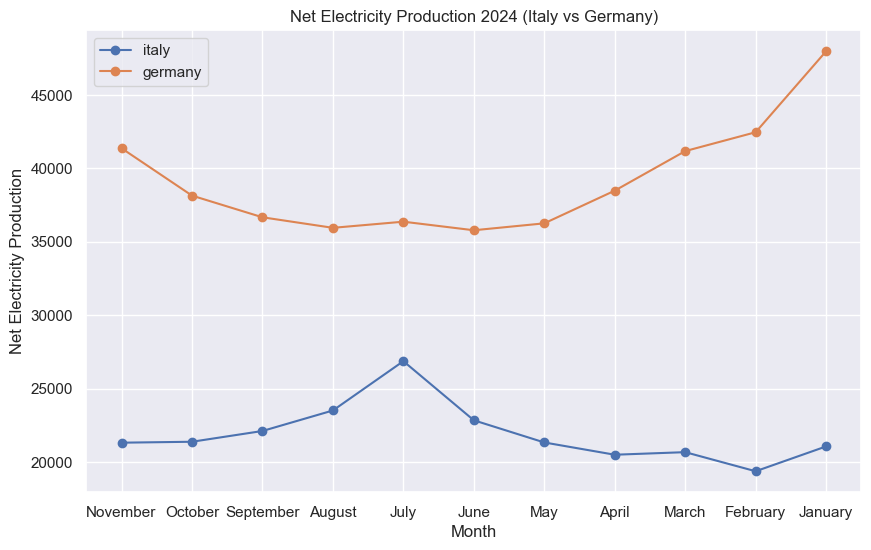

In [80]:
plt.figure(figsize=(10, 6))

plt.plot(italy2024['month'], italy2024['value'], label='italy', marker='o')
plt.plot(germany2024['month'], germany2024['value'], label='germany', marker='o')

plt.xlabel('Month')
plt.ylabel('Net Electricity Production')
plt.title('Net Electricity Production 2024 (Italy vs Germany)')
plt.legend()
plt.grid(True)
plt.show()

Aha <br>
Italy seems to have their plot maximised at the summer!<br>
well , enough looking around <br>
let's normalize our data and go home.

In [85]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147470 entries, 0 to 147496
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      147470 non-null  object 
 1   time         147470 non-null  object 
 2   balance      147470 non-null  object 
 3   product      147470 non-null  object 
 4   value        147470 non-null  float64
 5   unit         147470 non-null  object 
 6   month        147470 non-null  object 
 7   date_Format  147470 non-null  object 
dtypes: float64(1), object(7)
memory usage: 10.1+ MB


we'll use min max scaling for values.

In [86]:
df2['normalized_values'] = (df2['value'] - df2['value'].min()) / (df2['value'].max() - df2['value'].min())


C:\Users\darkoob\AppData\Local\Temp\ipykernel_14980\1531898964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['normalized_values'] = (df2['value'] - df2['value'].min()) / (df2['value'].max() - df2['value'].min())


In [87]:
df2['product'].unique()

array(['Electricity', 'Hydro', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Solar',
       'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Wind',
       'Other Combustible Non-Renewables', 'Geothermal', 'Not Specified',
       'Nuclear', 'Other Renewables'], dtype=object)

lets use one hot encoding for product type , seems appropriate

In [89]:
df2 = pd.get_dummies(df2, columns=['product'], dtype=int)


well alrighty , seems good!